In [1]:
from keras.utils.np_utils import to_categorical
import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras.optimizers import Adam
from keras import optimizers

%matplotlib inline

Using TensorFlow backend.


In [2]:
x_train = []
y_train = []

for dir in os.listdir("/home/yanai-lab/sugiya-y/space/study/keras/repo4/data/train"):
    if dir == ".DS_Store":
        continue
        
    dir1 = "/home/yanai-lab/sugiya-y/space/study/keras/repo4/data/train/" + dir
    label = 0
    
    if dir == "cats":
        label = 0
    elif dir == "dogs":
        label = 1
        
    for file in os.listdir(dir1):
        if file != ".DS_Store":
            y_train.append(label)
            filepath = dir1 + "/" + file
            image = np.array(Image.open(filepath).resize((150, 150)))
            image = image.astype("float32")
            x_train.append(image / 255.)
            
x_train = np.array(x_train)
Y_train = to_categorical(y_train)

In [3]:
x_test = []
y_test = []

for dir in os.listdir("/home/yanai-lab/sugiya-y/space/study/keras/repo4/data/validation"):
    if dir == ".DS_Store":
        continue
        
    dir2 = "/home/yanai-lab/sugiya-y/space/study/keras/repo4/data/validation/" + dir
    label = 0
    
    if dir == "cats":
        label = 0
    elif dir == "dogs":
        label = 1
        
    for file in os.listdir(dir2):
        if file != ".DS_Store":
            y_test.append(label)
            filepath = dir2 + "/" + file
            image = np.array(Image.open(filepath).resize((150, 150)))
            image = image.astype("float32")
            x_test.append(image / 255.)
            
x_test = np.array(x_test)
Y_test = to_categorical(y_test)


In [4]:


input_tensor = Input(shape=(150, 150, 3))
vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)



In [5]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
top_model.add(Dense(256))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2))
top_model.add(Activation('softmax'))

In [6]:


model = Model(inputs=vgg16_model.input, outputs=top_model(vgg16_model.output))



In [7]:
for layer in model.layers[:15]:
    layer.trainable = False
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [8]:
model.compile(loss='binary_crossentropy',                 
                optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
                metrics=['accuracy'])

In [9]:
batch_size = 32
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=2)

Train on 1800 samples, validate on 200 samples
Epoch 1/20
8s - loss: 0.7526 - acc: 0.6139 - val_loss: 0.6426 - val_acc: 0.6200
Epoch 2/20
6s - loss: 0.4716 - acc: 0.7767 - val_loss: 0.4049 - val_acc: 0.8250
Epoch 3/20
6s - loss: 0.3653 - acc: 0.8339 - val_loss: 0.5195 - val_acc: 0.7700
Epoch 4/20
6s - loss: 0.3208 - acc: 0.8606 - val_loss: 0.2175 - val_acc: 0.9350
Epoch 5/20
6s - loss: 0.2717 - acc: 0.8844 - val_loss: 0.3382 - val_acc: 0.8600
Epoch 6/20
6s - loss: 0.2439 - acc: 0.9028 - val_loss: 0.3214 - val_acc: 0.8700
Epoch 7/20
6s - loss: 0.2241 - acc: 0.9117 - val_loss: 0.2475 - val_acc: 0.8950
Epoch 8/20
6s - loss: 0.2005 - acc: 0.9211 - val_loss: 0.4389 - val_acc: 0.8050
Epoch 9/20
6s - loss: 0.1830 - acc: 0.9239 - val_loss: 0.3263 - val_acc: 0.8700
Epoch 10/20
6s - loss: 0.1681 - acc: 0.9344 - val_loss: 0.3454 - val_acc: 0.8500
Epoch 11/20
6s - loss: 0.1518 - acc: 0.9400 - val_loss: 0.1946 - val_acc: 0.9250
Epoch 12/20
6s - loss: 0.1409 - acc: 0.9494 - val_loss: 0.2276 - val_ac

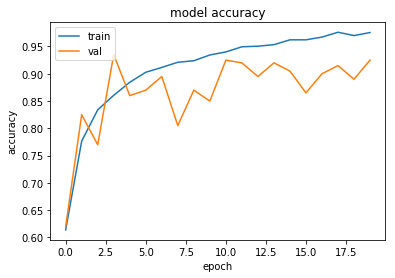

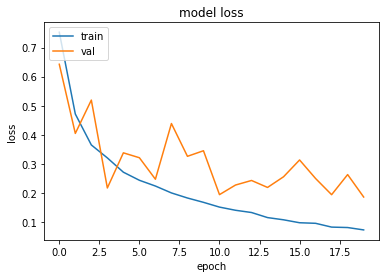

In [10]:


#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [11]:


_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))



accuracy: 0.9325
